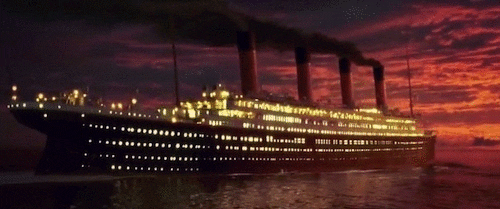

Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

What particularly we need do in this challenge ?

In this challenge, we need to complete the analysis of what sorts of people were likely to survive. In particular, we apply the tools of machine learning to predict which passengers survived the tragedy?.


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
train1=pd.read_csv("C:\\Users\\Rajeev kumar\\Downloads\\tested.csv")
train1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


What does this data set mean.
____
The data has been split into two groups:

training set (tested.csv)


The training set includes passengers survival status(also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass is used to create machine learning model.



Lets describe whats the meaning of the features given the both train & test datasets.

Variable Definition Key.
- Survival - 0= No - 1= Yes - pclass (Ticket class) - 1=1st - 2=2nd - 3=3rd
sex

age

sibsp (# of siblings / spouses aboard the Titanic)


- parch (# of parents / children aboard the Titanic)
- tickets
- fare
- cabin - embarked Port of Embarkation. - C = Cherbourg, - Q = Queenstown, - S = Southampton

In [39]:
train1.shape

(418, 12)

In [40]:
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We see Age and Cabin have a lot of missing value.So First we need to deal with all these NaN values.

 As in Cabin column about 1\3rd of the values are missing.So we get rid of    this column.

In [41]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [42]:
# drop the Cabin column from the data set
train1=train1.drop(columns="Cabin",axis=1)

In [43]:
#replacing the missing values in"age" column with mean value
train1['Age'].fillna(train1['Age'].mean(),inplace=True)

In [44]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [45]:
train1['Fare'].fillna(train1['Fare'].mean(),inplace=True)

In [46]:
train1.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
train1.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [84]:
train1.Survived.value_counts()/len(train1)*100

Survived
0    63.636364
1    36.363636
Name: count, dtype: float64

Data Analysis

In [48]:
#getting some stastical measure
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [49]:
#finding number of people survived
train1['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

Data visulisation


In [50]:
train1['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

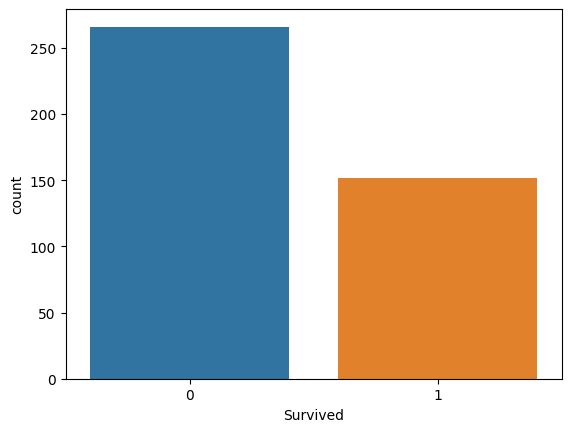

In [51]:
sns.countplot(x="Survived",data=train1)

In [52]:
train1['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

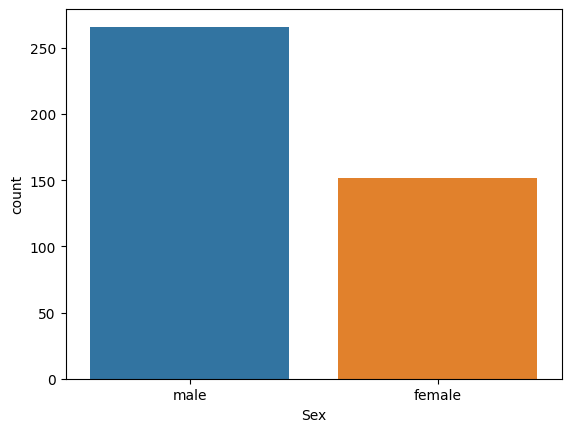

In [53]:
sns.countplot(x="Sex",data=train1)

<Axes: xlabel='Sex', ylabel='count'>

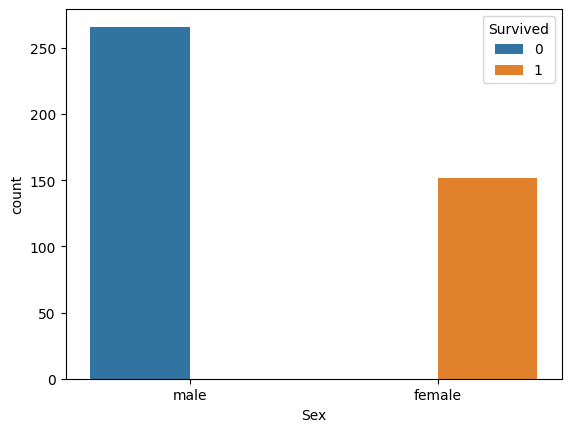

In [54]:
# number of surviver gender wise
sns.countplot(x="Sex",hue='Survived',data=train1)

<Axes: xlabel='Pclass', ylabel='count'>

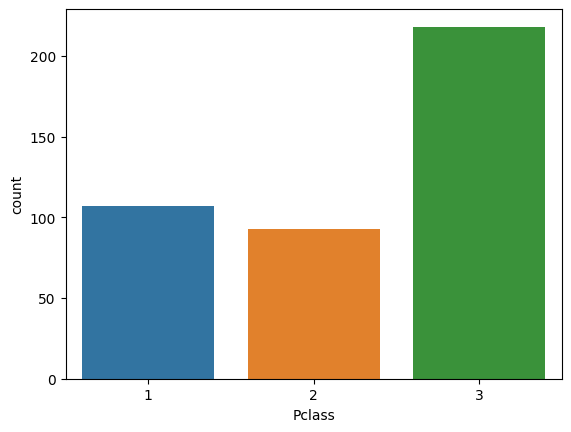

In [55]:
sns.countplot(x="Pclass",data=train1)

<Axes: xlabel='Pclass', ylabel='count'>

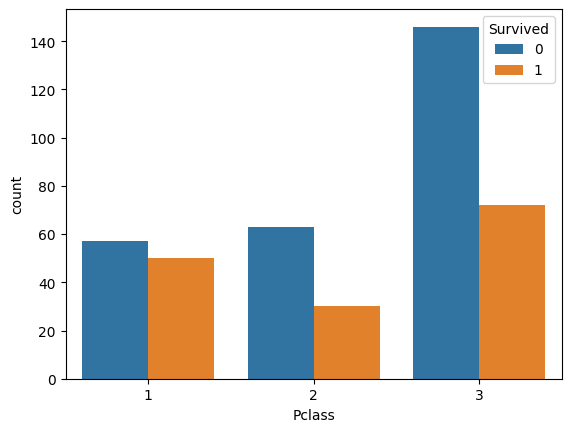

In [56]:
sns.countplot(x="Pclass",hue="Survived",data=train1)

Encoding to categrocial columns

In [57]:
train1['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [58]:
train1['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [59]:
#Converting categrocial column
train1.replace({"Sex":{'male':0,'female':1},"Embarked":{'S':0,'C':1,'Q':2}},inplace=True)

In [60]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


Separating features & target

In [88]:
X=train1.drop(columns=["PassengerId","Name","Ticket","Survived"],axis=1)
Y=train1["Survived"]

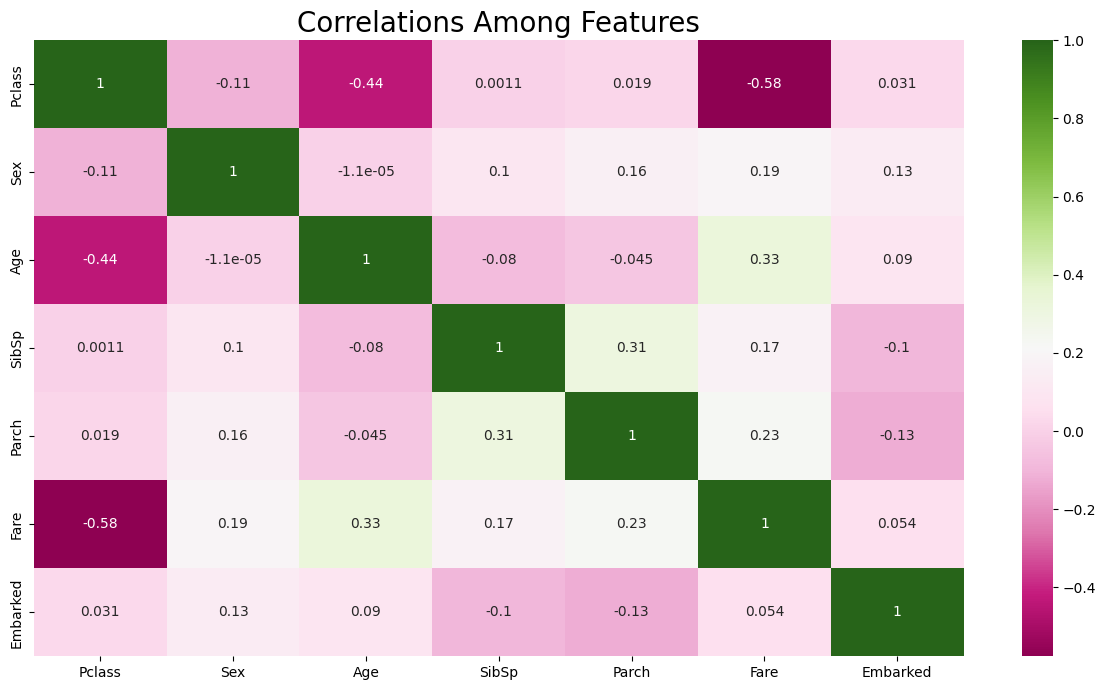

In [89]:
plt.subplots(figsize = (15,8))
sns.heatmap(X.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

In [62]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [63]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


Splitting Data intoTraining Data

In [67]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [68]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


Logistic Regression MOdel

In [69]:
model=LogisticRegression()

In [70]:
#training the Logistic model with training data
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation

Accuracy score

In [71]:
X_train_prediction=model.predict(X_train)

In [72]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [73]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [74]:
# accuracy on test data
X_test_prediction = model.predict(X_test)


In [75]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [76]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


In [77]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

Making a predictive system

In [91]:
from tkinter import  *
from tkinter import messagebox
root=Tk()
root.geometry("500x500")
root.resizable(0,0)
root.title("Titanic Passenger  Survival prediction")
name=Label(root,text="Passenger Name",fg="white",bg="black",font=25)
name.place(x=70,y=30)
name_ent=Entry(root,borderwidth=5,width=20,fg='white',bg='black',font=25)
name_ent.place(x=250,y=30)
Pclass=Label(root,text="Passenger  class",fg="white",bg="black",font=25)
Pclass.place(x=70,y=70)
Pclass_1= IntVar()
radiobutton_1 = Radiobutton(root, text='1', variable=Pclass_1, value=1,width=5)
radiobutton_1.place(x=250,y=70)
radiobutton_2 = Radiobutton(root, text='2', variable=Pclass_1, value=2,width=5)
radiobutton_2.place(x=300,y=70)
radiobutton_3 = Radiobutton(root, text='3', variable=Pclass_1, value=3,width=5,)
radiobutton_3.place(x=350,y=70)
root.attributes('-alpha',0.85)
root.configure(bg='black')
Sex=Label(root,text="Sex",fg="white",bg="black",font=25)
Sex.place(x=70,y=110)
gender = IntVar()
radiobutton_11 = Radiobutton(root, text='Male', variable=gender, value=0)
radiobutton_11.place(x=250,y=110)
radiobutton_22 = Radiobutton(root, text='Female', variable=gender, value=1)
radiobutton_22.place(x=320,y=110)
Age=Label(root,text="Age",fg="white",bg="black",font=25)
Age.place(x=70,y=150)
Age_ent=Entry(root,borderwidth=5,width=20,fg='white',bg='black',font=25)
Age_ent.place(x=250,y=150)
Sibsp=Label(root,text="Number of Siblings",fg="white",bg="black",font=25)
Sibsp.place(x=70,y=190)
Sibsp2=Label(root,text=" aboard the Titanic",fg="white",bg="black",font=25)
Sibsp2.place(x=70,y=215)
Sibsp_ent=Entry(root,borderwidth=5,width=20,fg='white',bg='black',font=25)
Sibsp_ent.place(x=250,y=190)
parch1=Label(root,text="Number of children",fg="white",bg="black",font=25)
parch1.place(x=70,y=250)
parch2=Label(root,text="abroad the Titanic",fg="white",bg="black",font=25)
parch2.place(x=70,y=275)
parch_ent=Entry(root,borderwidth=5,width=20,fg='white',bg='black',font=25)
parch_ent.place(x=250,y=250)
Fare=Label(root,text="Passenger fare",fg="white",bg="black",font=25)
Fare.place(x=70,y=310)
Fare_ent=Entry(root,borderwidth=5,width=20,fg='white',bg='black',font=25)
Fare_ent.place(x=250,y=310)
Embarked=Label(root,text="Port of Embarkation",fg="white",bg="black",font=25)
Embarked.place(x=70,y=350)
Embarked_1= IntVar()
radiobutton_111 = Radiobutton(root, text='S', variable=Embarked_1, value=0,width=5)
radiobutton_111.place(x=250,y=350)
radiobutton_222 = Radiobutton(root, text='C', variable=Embarked_1, value=1,width=5)
radiobutton_222.place(x=300,y=350)
radiobutton_333 = Radiobutton(root, text='Q', variable=Embarked_1, value=2,width=5,)
radiobutton_333.place(x=350,y=350)

def submit1():
    x1=name_ent.get()
    first=Pclass_1.get()
    second=gender.get()
    third=float(Age_ent.get())
    fourth=int(Sibsp_ent.get())
    fifth=int(parch_ent.get())
    sixth=float(Fare_ent.get())
    seventh=Embarked_1.get()
    input_data = (first,second,third,fourth,fifth,sixth,seventh)
    # changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)
    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
    # standardize the input data
    std_data = scaler.transform(input_data_reshaped)
    prediction = model.predict(std_data)
    if (prediction[0] == 0):
        messagebox.showinfo("prediction",f'Sorry!, {x1} is not survived')

    else:
        messagebox.showinfo("prediction",f'{x1} is survived')
    root.destroy()
        
submit=Button(root,text="SUBMIT",fg="black",bg="red",font=25,command=submit1)
submit.place(x=200,y=400)
root.mainloop()



C:\python 37\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\python 37\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Dataset source:https://www.kaggle.com/datasets/brendan45774/test-file


This project is made by Rajeev kumar during internship at CodSoft
